In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
data = [['Rob',27,70000],
['Michael',29,90000],
['Mohan',29,61000],
['Ismail',28,60000],
['Kory',42,150000],
['Gautam',39,155000],
['David',41,160000],
['Andrea',38,162000],
['Brad',36,156000],
['Angelina',35,130000],
['Donald',37,137000],
['Tom',26,45000],
['Arnold',27,48000],
['Jared',28,51000],
['Stark',29,49500],
['Ranbir',32,53000],
['Dipika',40,65000],
['Priyanka',41,63000],
['Nick',43,64000],
['Alia',39,80000],
['Sid',41,82000],
['Abdul',39,58000]]
df = pd.DataFrame(data,columns= ['Name','Age','Income($)'])
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


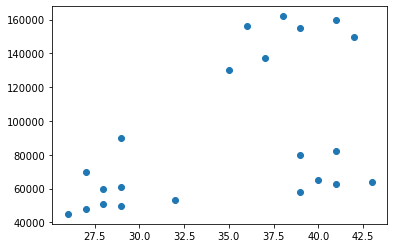

In [4]:
plt.scatter(df.Age,df['Income($)'])

In [5]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [6]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [7]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


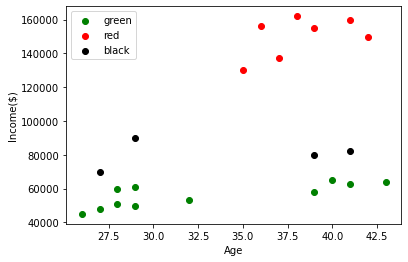

In [8]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

a1=plt.scatter(df1.Age,df1['Income($)'],color='green')
a2=plt.scatter(df2.Age,df2['Income($)'],color='red')
a3=plt.scatter(df3.Age,df3['Income($)'],color='black')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend([a1,a2,a3],['green','red','black'])

In [12]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [13]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Income($)','Age']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [14]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


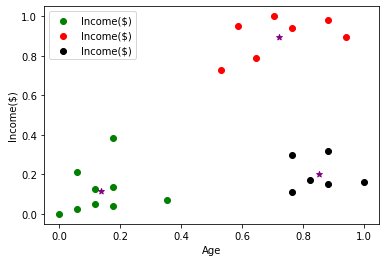

In [16]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green',label='Income($)')
plt.scatter(df2.Age,df2['Income($)'],color='red',label='Income($)')
plt.scatter(df3.Age,df3['Income($)'],color='black',label='Income($)')
plt.scatter(km.cluster_centers_[:,1],km.cluster_centers_[:,0],color='purple',marker='*')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [34]:
km.cluster_centers_

array([[0.11633428, 0.1372549 ],
       [0.2022792 , 0.85294118],
       [0.8974359 , 0.72268908]])

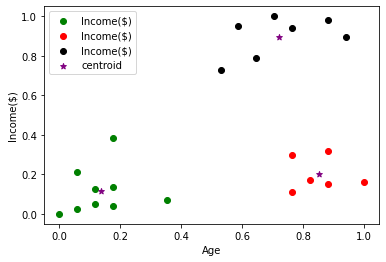

In [37]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green',label='Income($)')
plt.scatter(df2.Age,df2['Income($)'],color='red',label='Income($)')
plt.scatter(df3.Age,df3['Income($)'],color='black',label='Income($)')
plt.scatter(km.cluster_centers_[:,1],km.cluster_centers_[:,0],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [21]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [22]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.4750783498553095,
 0.3491047094419565,
 0.26217927623452125,
 0.2105547899547249,
 0.16858512236029757,
 0.13265419827245162,
 0.10497488680620906]

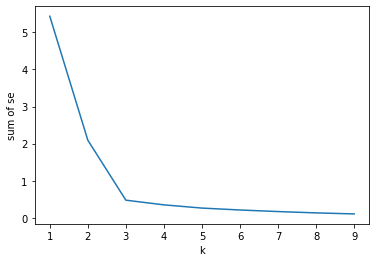

In [23]:
plt.xlabel('k')
plt.ylabel('sum of se')
plt.plot(k_rng,sse)